In [ ]:
#resources 
#https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74


In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

from time import sleep

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:

#driver = webdriver.Chrome('/Users/amywinecoff/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
#driver = webdriver.Chrome(ChromeDriverManager().install())
#driver = webdriver.Chrome('~/Documents/CITP/Research/Github/visual-ethics/chromedriver')
driver.get('https://www.python.org')
sleep(1)

driver.get_screenshot_as_file("screenshot.png")
driver.quit()
print("end...")



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [/Users/amywinecoff/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver] found in cache


end...


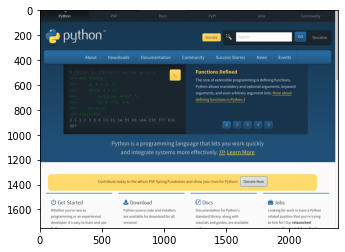

In [4]:
image = cv2.imread('screenshot.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [6]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [7]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_    
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]    
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")  
    
    color_array = np.array(list(counts.values()))
    color_proportion = (color_array/sum(color_array)).round(3).tolist()
    print(hex_colors)

['#faf9f9', '#192e3f', '#fcd769', '#949fa5', '#23537b']


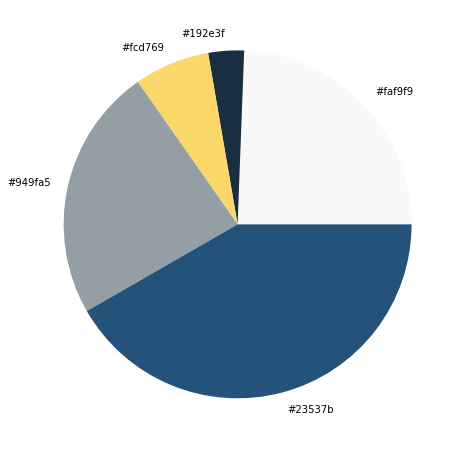

In [8]:
modified_image = prep_image(image)
color_analysis(modified_image)

In [10]:
clf = KMeans(n_clusters = 5)
#produces a label, presumably for each pixel in the image, based on the clustering analysis
color_labels = clf.fit_predict(modified_image)
center_colors = clf.cluster_centers_ 
#counts up the total number of pixels (?) assigned to each cluster 
counts = Counter(color_labels)
#takes the r, g, and b values of the cluster centroids, and converts then in the next step to hex colors
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]    
#plt.figure(figsize = (12, 8))
#plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
#plt.savefig("color_analysis_report.png")

In [21]:
ordered_colors

[array([ 35.59351144,  83.93144546, 123.00767203]),
 array([147.4746421 , 158.7085784 , 164.34713128]),
 array([253.1051434 , 216.00806964, 105.54812679]),
 array([250.15027074, 249.35158126, 249.90371969]),
 array([25.68240599, 46.47089136, 63.34915706])]

In [12]:
hex_colors

['#192e3f', '#23537b', '#faf9f9', '#939ea4', '#fdd869']

In [14]:
color_labels.shape

(540000,)

In [27]:
color_proportion = list(counts.values())/sum(list(counts.values()))

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [18]:
counts.keys()

dict_keys([4, 0, 3, 1, 2])

In [25]:
sum(list(counts.values()))

540000

In [35]:
color_array = np.array(list(counts.values()))
color_proportion = (color_array/sum(color_array)).round(3).tolist()

In [36]:
color_proportion

[0.244, 0.033, 0.07, 0.236, 0.417]

In [30]:
sum(color_array)

540000